# Convert **None Normal Distibution** to **Normal Distibution** data.

In [122]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")

import warnings 
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [126]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

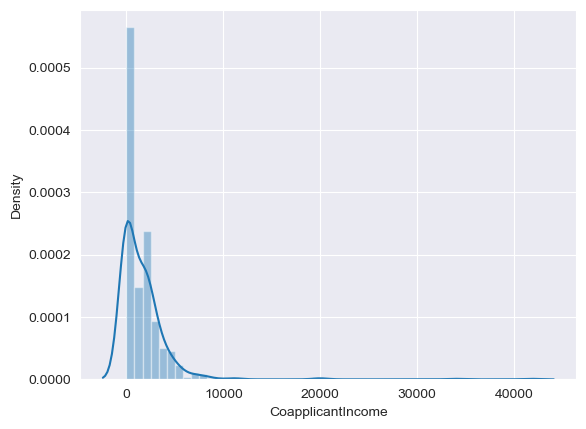

In [128]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

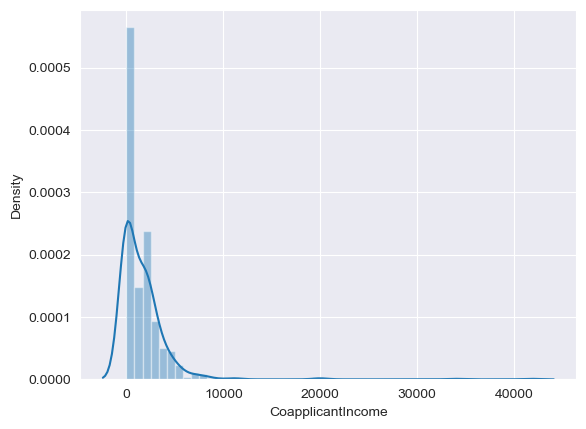

In [131]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

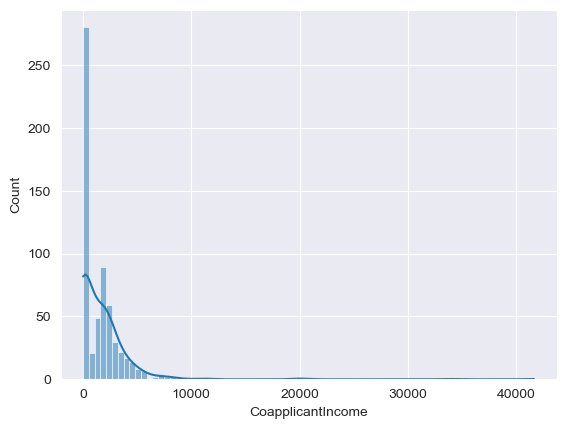

In [133]:
sns.histplot(df['CoapplicantIncome'], kde=True)
plt.show()

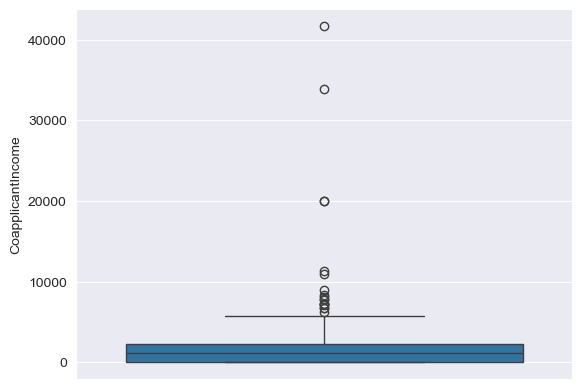

In [135]:
sns.boxplot(df['CoapplicantIncome'])
plt.show()

# Using **log1p** Mathode

In [138]:
# For "FunctionTransformer" Mathode , no need to remove Outlier , it automaticaly remove the outlier.
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func=np.log1p) 

ft.fit(df[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [140]:
df['CoapplicantIncome_ft'] = ft.transform(df[['CoapplicantIncome']])

df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ft
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,7.319202
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.000000


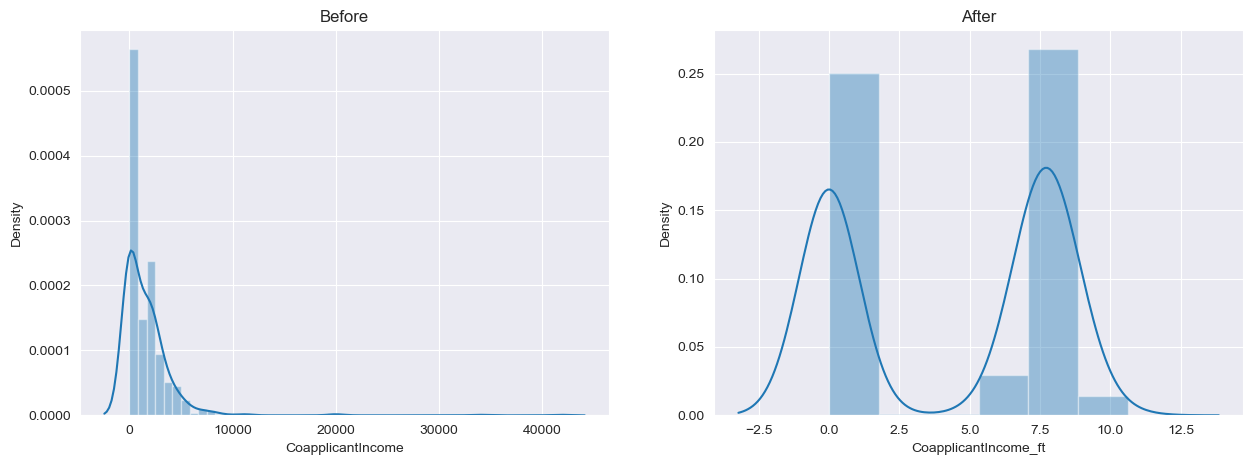

In [142]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(df['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('After')
sns.distplot(df['CoapplicantIncome_ft'])

plt.show()


# Using **x^2** Mathode

In [145]:
df = pd.read_csv(r"H:\Programming\Files\Machine Learning\Files\Loan Dataset.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [147]:
# Removing Outlier  
# For " x^2 " Mathode , need to remove Outlier , it din't automaticaly remove the outlier. 
q1 = df['CoapplicantIncome'].quantile(0.25)
q3 = df['CoapplicantIncome'].quantile(0.75)

IQR = q3 - q1 

min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)

df = df[(df['CoapplicantIncome'] >= min_range) & (df['CoapplicantIncome'] <= max_range)]


In [148]:
from sklearn.preprocessing import FunctionTransformer
ft = FunctionTransformer(func= lambda x : x**2)

ft.fit(df[['CoapplicantIncome']])

FunctionTransformer(func=<function <lambda> at 0x000001DCD129B600>)

In [149]:
df['CoapplicantIncome_ft_x^2'] = ft.transform(df[['CoapplicantIncome']])

df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ft_x^2
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2274064.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0.0


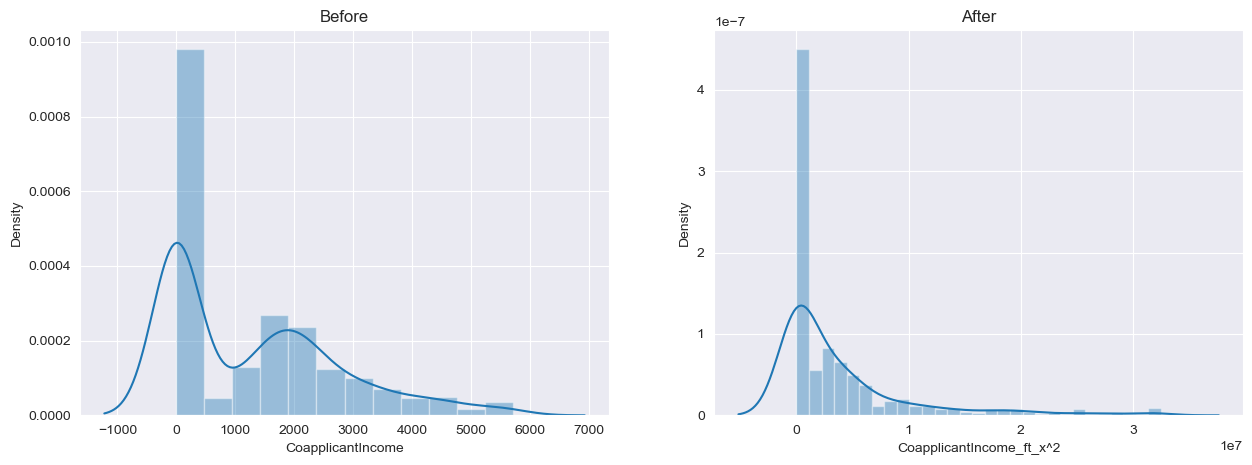

In [150]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(df['CoapplicantIncome'])

plt.subplot(1,2,2)
plt.title('After')
sns.distplot(df['CoapplicantIncome_ft_x^2'])

plt.show()
